In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

# Reading the datasets

## Reading the global dataset

In [3]:
df = pd.read_csv("../../../../data/interim/Global-Dataset/global_dataset.csv")

<IPython.core.display.Javascript object>

## Reading the local dataset for plant AM

In [4]:
df_am = pd.read_csv("../../../../data/processed/209/am.csv")

<IPython.core.display.Javascript object>

# Preprocessing of Global Dataset

### Removing the plant to be fine-tuned

In [5]:
df.shape

(66111, 48)

<IPython.core.display.Javascript object>

In [6]:
df = df[df["Factory_Plant"] != "209_AM"].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [7]:
df.shape

(62152, 48)

<IPython.core.display.Javascript object>

### Removing non-matching columns between the datasets

In [8]:
df = df[df_am.columns.to_list() + ["Factory_Plant"]]

<IPython.core.display.Javascript object>

In [9]:
df.shape

(62152, 20)

<IPython.core.display.Javascript object>

## Removing missing features

In [10]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
Insoluble Residue,28.583151
Fe2O3,25.860793
Al2O3,25.854357
SiO2,25.828614
CaO,25.685416
#325,12.656069
Na2O,12.076844
K2O,9.611919
CS3,6.511456
Initial setting time,4.501866


<IPython.core.display.Javascript object>

<Axes: >

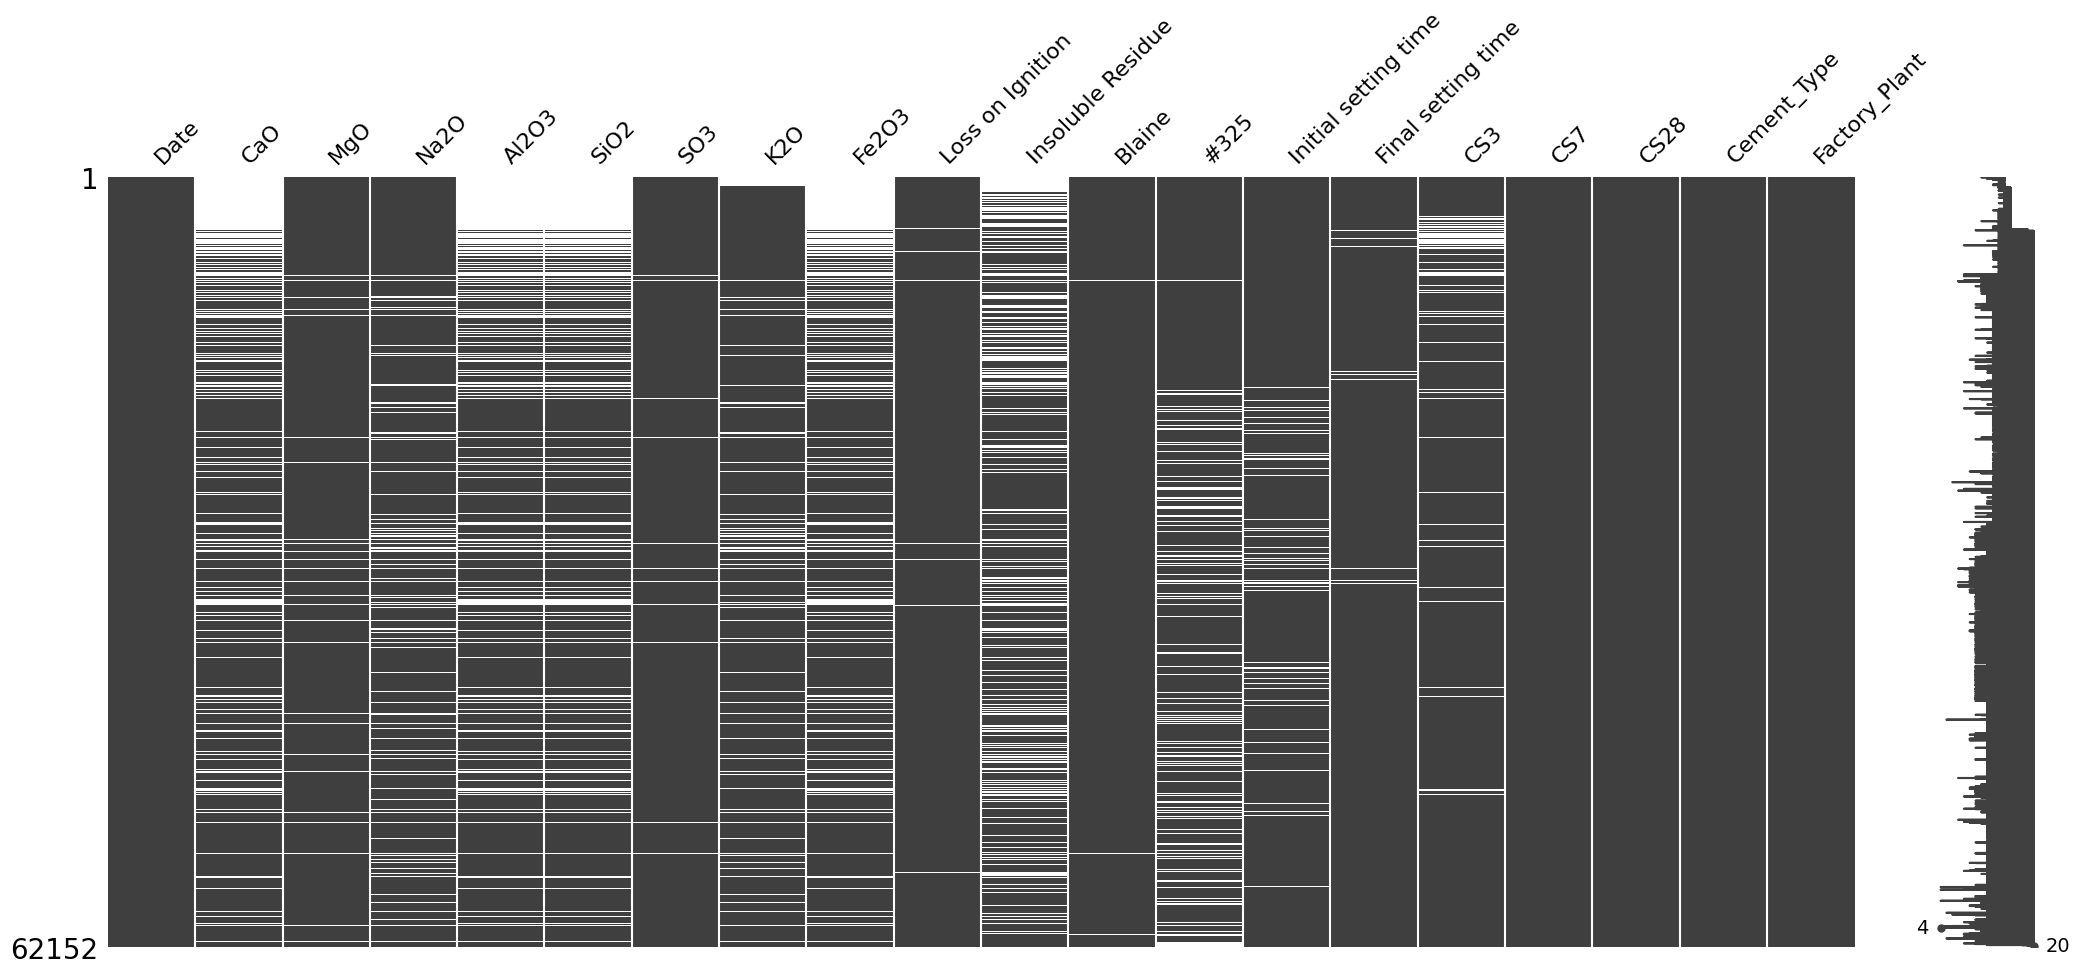

<IPython.core.display.Javascript object>

In [11]:
msno.matrix(df)

In [12]:
# msno.matrix(df.loc[(df["CS1"].notna() == True)])

<IPython.core.display.Javascript object>

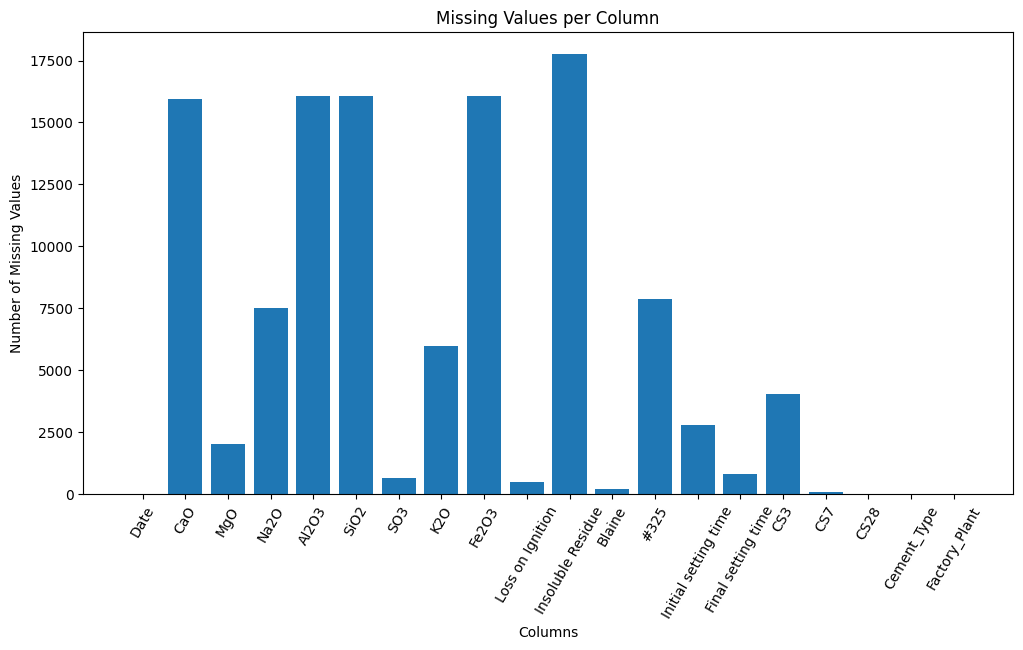

<IPython.core.display.Javascript object>

In [13]:
missing_counts = df.isnull().sum()
plt.figure(figsize=(12, 6))
plt.bar(missing_counts.index, missing_counts.values)
plt.xticks(rotation=60)
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Column")
plt.show()

### Removing features with many zeros when applicable

In [14]:
zero_values = {}
for col in df.select_dtypes(include="number").columns:
    zero_percentages = (df[df[col].eq(0)].shape[0] / df.shape[0]) * 100
    zero_values[col] = zero_percentages

zero_percentages = pd.Series(zero_values, name=f"Zero (%) for Global Dataset")
zero_percentages = zero_percentages.sort_values(ascending=False)
zero_percentages = zero_percentages.to_frame(name=f"Zero (%) for Global Dataset")
zero_percentages.style.background_gradient(cmap="Reds")

,Zero (%) for Global Dataset
Na2O,1.563908
Insoluble Residue,0.661282
#325,0.349144
Loss on Ignition,0.104582
Blaine,0.098146
Initial setting time,0.088493
Final setting time,0.086884
SO3,0.065967
MgO,0.022525
K2O,0.011263


<IPython.core.display.Javascript object>

### Drop rows where the target variable is null

In [15]:
df = df[df["CS28"].notna()]

<IPython.core.display.Javascript object>

### Dropping rows where the target variable is zero

In [16]:
df = df[~df["CS28"].eq(0)]

<IPython.core.display.Javascript object>

### Dropping rows where any other variable has a zero value - except #200

In [17]:
for col in df.columns:
    if col != "#200":
        df = df[~df[col].eq(0)]

<IPython.core.display.Javascript object>

In [18]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
Insoluble Residue,27.957684
Fe2O3,26.532234
Al2O3,26.527267
SiO2,26.500778
CaO,26.353432
#325,12.888646
Na2O,12.299262
K2O,9.822522
CS3,6.690176
Initial setting time,4.595874


<IPython.core.display.Javascript object>

<Axes: >

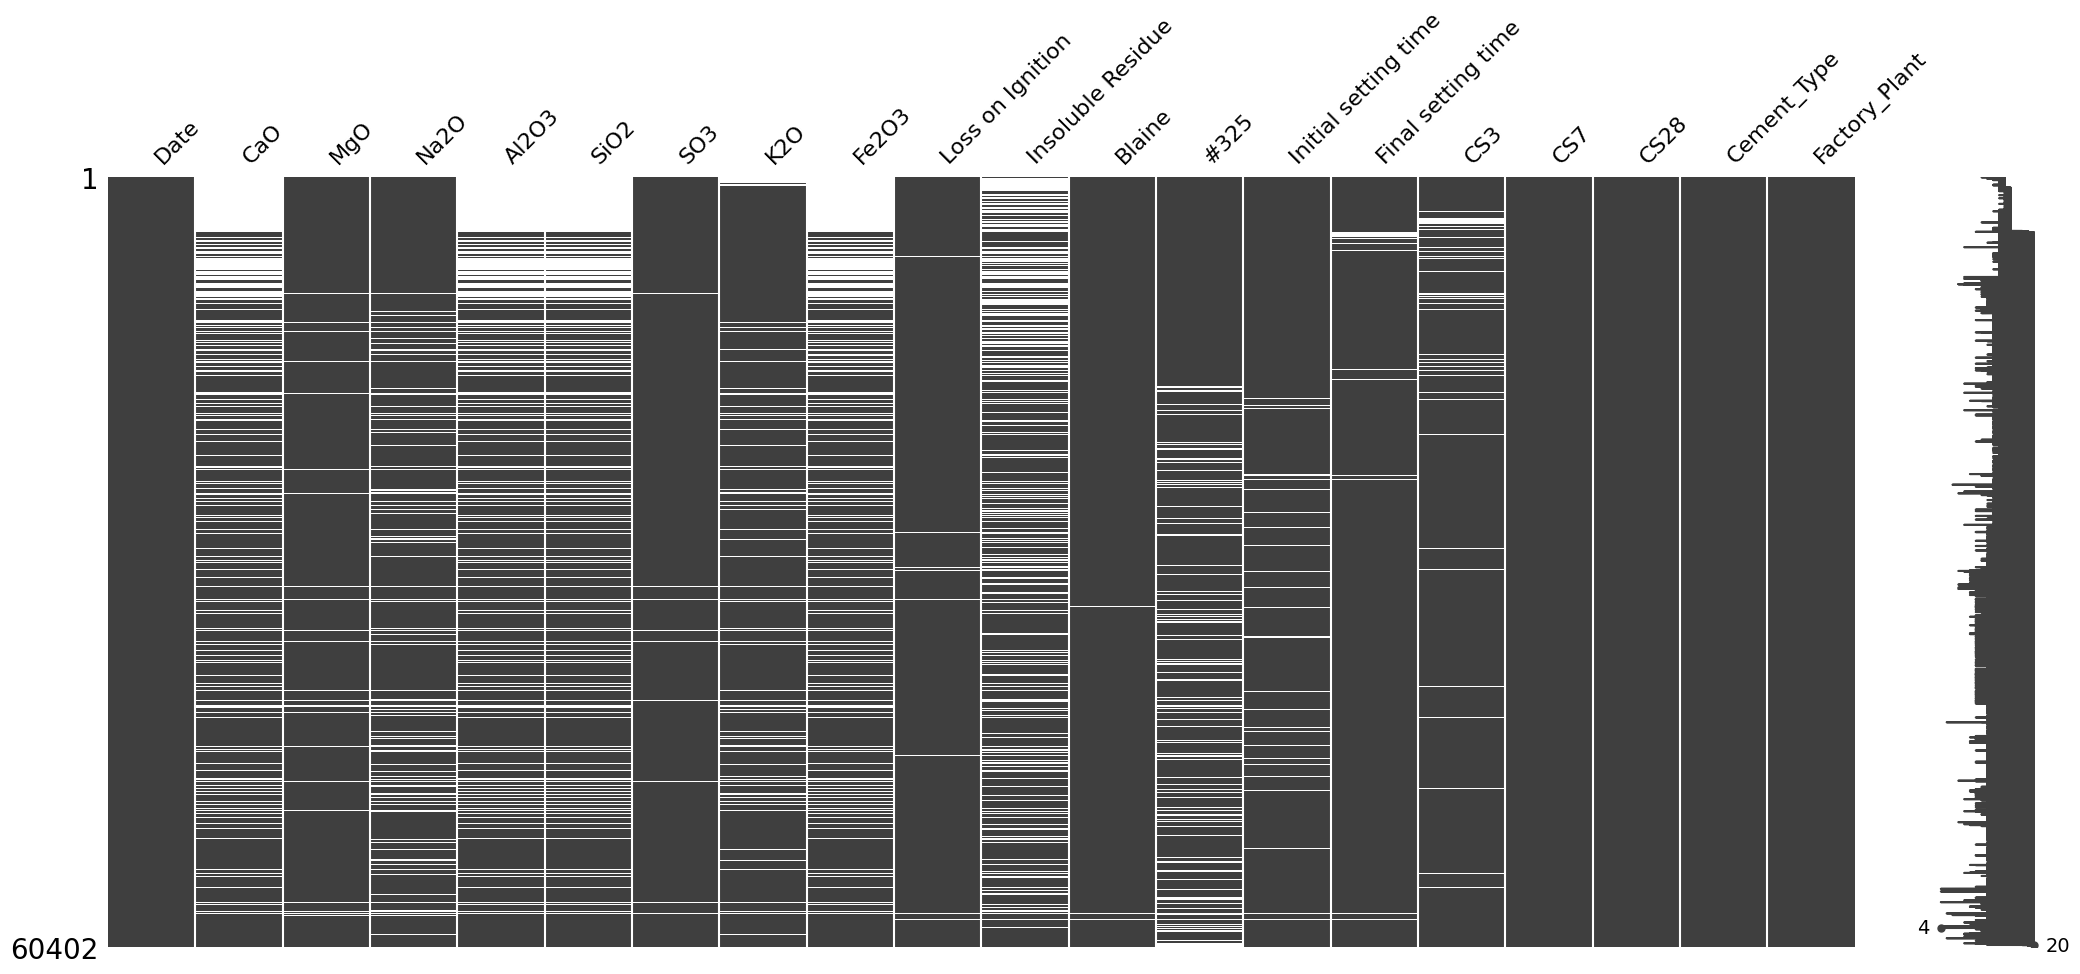

<IPython.core.display.Javascript object>

In [19]:
msno.matrix(df)

In [20]:
zero_values = {}
for col in df.select_dtypes(include="number").columns:
    zero_percentages = (df[df[col].eq(0)].shape[0] / df.shape[0]) * 100
    zero_values[col] = zero_percentages

zero_percentages = pd.Series(zero_values, name=f"Zero (%) for Global Dataset")
zero_percentages = zero_percentages.sort_values(ascending=False)
zero_percentages = zero_percentages.to_frame(name=f"Zero (%) for Global Dataset")
zero_percentages.style.background_gradient(cmap="Reds")

,Zero (%) for Global Dataset
CaO,0.000000
Insoluble Residue,0.000000
CS7,0.000000
CS3,0.000000
Final setting time,0.000000
Initial setting time,0.000000
#325,0.000000
Blaine,0.000000
Loss on Ignition,0.000000
MgO,0.000000


<IPython.core.display.Javascript object>

In [21]:
df.shape

(60402, 20)

<IPython.core.display.Javascript object>

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60402 entries, 0 to 62151
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  60402 non-null  object 
 1   CaO                   44484 non-null  float64
 2   MgO                   58435 non-null  float64
 3   Na2O                  52973 non-null  float64
 4   Al2O3                 44379 non-null  float64
 5   SiO2                  44395 non-null  float64
 6   SO3                   59774 non-null  float64
 7   K2O                   54469 non-null  float64
 8   Fe2O3                 44376 non-null  float64
 9   Loss on Ignition      59960 non-null  float64
 10  Insoluble Residue     43515 non-null  float64
 11  Blaine                60216 non-null  float64
 12  #325                  52617 non-null  float64
 13  Initial setting time  57626 non-null  float64
 14  Final setting time    59642 non-null  float64
 15  CS3                   56

<IPython.core.display.Javascript object>

### Sort the dataset by date

In [23]:
df["Date"] = pd.to_datetime(df["Date"])

<IPython.core.display.Javascript object>

In [24]:
df = df.sort_values(by="Date")

<IPython.core.display.Javascript object>

## Saving the dataset

<h3>Saving for feature engineering</h3>

In [25]:
df.to_csv("../../../../data/interim/209/global_am.csv", index=False)

<IPython.core.display.Javascript object>